In [1]:
from IPython.display import display
import scipy as sp
import numpy as np
import scipy.stats
import pandas as pd
from math import log
from scipy.optimize import curve_fit
#from sklearn import datasets, linear_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import math as mt
from scipy.stats import chi2
#from matplotlib2tikz import save as tikz_save

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# La funzione chiq prende come parametri i valori teorici, le osservazioni, e gli errori sulle osservazioni
def chiq(exp, obs, obsErr):
    return sum(np.power((exp - obs),2)/np.power(obsErr,2))

# La funzione testchiq prende come parametri i gradi di libertà, quantile inf, quantile sup e valore del chi quadro
def testchiq(degf,infq,supq,valchiq):
    infchiq = chi2.isf(q=1-infq, df=degf);
    supchiq = chi2.isf(q=1-supq, df=degf);
    print('Chi quadrato per modello e osservazioni: %f.' % valchiq )
    print('Studiamo se il chi quadro è nel range [%f, %f]' % (infchiq, supchiq))
    if (valchiq <= supchiq) & (valchiq >= infchiq):
        print(color.BOLD + color.GREEN + 'Test del chi quadro superato!' + color.END + color.END)
    else:
        print(color.BOLD + color.RED + 'Test del chi quadro non superato!'+ color.END + color.END)

# La funzione stattest prende come parametri valore 1, errore 1, valore 2, errore 2, e infine il fattore di copertura.
def stattest(val1, val2, err1, err2, kcop):
    R = abs(val1 - val2)
    errR = np.sqrt(err1**2 + err2**2)
    infconf = R - kcop * errR
    supconf = R + kcop * errR
    if (0 > infconf) & (0 < supconf):
        print(color.BOLD + color.GREEN + 'Il test è superato con una confidenza di %.1f sigma!' % (kcop) + color.END + color.END)
    else:
        print(color.BOLD + color.RED + 'Il test non è superato con un confidenza di %.1f sigma' % (kcop) + color.END + color.END)
        
def constfunc(q):
    return q

def linfunc(x,m,q):
    return m*x + q

def lferr(x,y,yerr):
    w = 1/np.power(yerr,2)
    Delta = sum(w) * sum(w*np.power(x,2)) - np.power(sum(w*x),2)
    qerr = np.sqrt(sum(w)/Delta)
    merr = np.sqrt(sum(w*np.power(x,2))/Delta)
    return (qerr, merr)

def dirfunc(x,m):
    return m*x

def epmult(q1,q2,e1,e2):
    q = abs(q1 * q2)
    return np.sqrt(np.power((e1/q1),2)+np.power((e2/q2),2)) * q
def epdiv(q1,q2,e1,e2):
    q = abs(q1 / q2)
    return np.sqrt(np.power((e1/q1),2)+np.power((e2/q2),2)) * q
def epsum(e1,e2):
    return np.sqrt(np.power(e1,2)+np.power(e2,2))
def eppow(q1,e1,p):
    qp = np.power(q1,p)
    return abs(qp) * p * (e1/abs(q1))

def wavgerr(w):
    return 1/np.sqrt(sum(w))

# Imposto le costanti e le risoluzioni di misura
g = 9.8071
Dmass = 1e-4 # Espresso in kg
Dtime = 1e-2 # Espresso in sec
Dlength = 1e-3 # Espresso in m, riferito al metro a nastro
Dcalip = 5e-5 # Espresso in m, riferito al calibro

## Sommario

Riportiamo i risultati e la discussione di questi ultimi per quanto riguarda l'esperienza di laboratorio che abbiamo effettuato. Abbiamo misurato i periodi di un pendolo, cambiando le masse attaccate e la lunghezza del filo. Non è falsfificata l'indipendenza del periodo dalla massa e nemmeno la dipendenza quadratica del periodo dalla lunghezza del filo. Abbiamo calcolato infine l'accelerazione di gravità, che ci risulta compatibile / incompatibile con i valori tabulati.

## Materiali

- Cilindri di masse e materiali diversi;
- 1 metro a nastro (risoluzione \SI{1}{\milli\meter});
- 1 calibro a nonio (risoluzione \SI{0.05}{\milli\meter});
- 1 cronometro manuale (risoluzione di lettura \SI{0.01}{\sec});
- 1 bilancia elettronica (risoluzione \SI{0.1}{\gram})

## Introduzione

### Calcolo incertezze apriori

## Procedimento

## Descrizione variabili

- `A3_1` è il DataFrame con le misure del periodo del pendolo, 5 misure di 10 periodi. Le prime tre colonne sono riferite alla terza massa per i tre diversi operatori;
- `periodiMasse` contiene in colonna le quattro misure dei periodi delle quattro masse effettuati da Pegoretti;
- `mediaPeriodi1` effettua la campionaria sulle colonne di `periodiMasse`;
- `stdPeriodi1` effettua la deviazione standard sulle colonne di `periodiMasse`;
- `A3_2` contiene in colonna i vari periodi riferiti a lunghezze di filo diverse;
- `lunghezze` contiene una unica colonna con le 10 misure di lunghezza;
- `datiPlus` raccoglie le informazioni sui quattro cilindri, altezza (`hCil`) e massa (`mCil`), nelle prime due colonne, e quelle sulle quattro lunghezze delle quattro misure iniziali.

Per fare le medie pesate:
```
    weighted_avg = np.average( [dati] , weights= [pesi] )
```

In [2]:
A3_1 = pd.read_csv('misure3_1.csv', index_col=False, header=0)
periodiMasse = A3_1.iloc[:, [3, 4, 1, 5]]
mediaPeriodi1 = periodiMasse.mean()
stdPeriodi1 = periodiMasse.std()
A3_2 = pd.read_csv('misure3_2.csv')
datiPlus = pd.read_csv('masse.csv')
hCil = datiPlus.iloc[:,0]
mCil = datiPlus.iloc[:,1]
lFilo1 = datiPlus.iloc[:,2]
masse = datiPlus.mCil.values
lunghezze = pd.read_csv('lunghezze.csv')
lunghezze = np.transpose(lunghezze.values)[0]
a = A3_1.values
hCil

0    0.04785
1    0.05015
2    0.01910
3    0.04710
Name: hCil, dtype: float64

In [3]:
wPeriodiWm1 = 1/np.power((stdPeriodi1.values.tolist()),2)

# Faccio la media pesata
periodiWm1 = np.average(mediaPeriodi1.values.tolist(), weights=stdPeriodi1.values.tolist())
errPeriodiWm1 = 1/(np.sqrt(sum(wPeriodiWm1)))

print("La media pesata del periodo è (%.2f +- %.2f) s." % (periodiWm1, errPeriodiWm1))

chiq1 = chiq(periodiWm1, mediaPeriodi1.values, stdPeriodi1)
testchiq(3, 0.005, 0.995, chiq1)

La media pesata del periodo è (20.24 +- 0.03) s.
Chi quadrato per modello e osservazioni: 4.246455.
Studiamo se il chi quadro è nel range [0.071722, 12.838156]
Test del chi quadro superato!


In [4]:
# I seguenti dati si riferiscono al fit a linfunc di masse e periodi
popt1,pcov1 = curve_fit(linfunc, datiPlus.mCil.values, mediaPeriodi1.values)
x1 = datiPlus.mCil.values
y1 = mediaPeriodi1.values
y1Err = stdPeriodi1

fig1 = plt.figure();
plt.errorbar(masse.tolist(), mediaPeriodi1.values.tolist(), yerr=stdPeriodi1.values.tolist(), fmt=' ', marker='.', ms=7, capsize=0)
plt.ylim((19.5, 21))
plt.xlim((50, 530))
plt.grid()
plt.plot(x1,linfunc(x1, *popt1), 'r-')
plt.xlabel('masse [g]')
plt.ylabel('periodi [s]')
fig1.patch.set_facecolor('#ffffff')
fig1.savefig("fig1.pdf", bbox_inches='tight')
plt.show()

chiq2 = chiq(linfunc(x1,*popt1), y1, y1Err)
testchiq(2, 0.005, 0.995, chiq2)

qerr1 = lferr(x1, y1, y1Err)[1]
print('La pendenza è (%.2f +- %.2f) s/kg' % (popt1[0], qerr1))

stattest(popt1[0], 0, qerr1, 0, 3)

#print('i valori di a e b che minimizzano il chi2 sono: a = % e b = %' % (popt1[0], popt1[1]))
display(popt1[0], popt1[1], lferr(x1,y1,y1Err)[0])

Chi quadrato per modello e osservazioni: 3.447509.
Studiamo se il chi quadro è nel range [0.010025, 10.596635]
Test del chi quadro superato!
La pendenza è (0.00 +- 0.05) s/kg
Il test è superato con una confidenza di 3.0 sigma!


3.8900424571618284e-05

20.223755314098756

0.00019259420809023667

In [5]:
# Grafico (l, T) con assi lineari
mediaPeriodi2 = A3_2.mean()
errPeriodi2 = A3_2.std()
lunghezze2 = lunghezze + hCil[2]/2

x2 = lunghezze2.tolist()
y2 = mediaPeriodi2.values.tolist()
x2err = np.sqrt((Dlength**2 / 12) + (Dcalip**2 / 12)) # Si è scelto l'errore dovuto alla risoluzione
y2err = errPeriodi2.values.tolist()

y2 = np.array(y2)/10
y2err = np.array(y2err)/10

fig2 = plt.figure()
plt.errorbar(x2, y2, xerr=x2err, yerr=y2err, fmt=' ', marker='.', ms=7, capsize=0)
plt.grid()
plt.xlabel('lunghezze [m]')
plt.ylabel('periodi [s]')
sub2 = plt.axes([.62, .25, .25, .25])
sub2.grid()
sub2.errorbar(x2, y2, xerr=x2err, yerr=y2err, fmt=' ', marker='.', ms=3, capsize=0)
sub2.set_xlim([x2[4] - 2*x2err, x2[4] + 2*x2err])
sub2.set_ylim([y2[4] - 2*y2err[4], y2[4] + 2*y2err[4]])
sub2.set_xlabel('lunghezze [m]')
sub2.set_ylabel('periodi [s]')
fig2.savefig("fig2.pdf", bbox_inches='tight')
plt.show()
display(x2[9],x2err,y2[9],y2err[9])
display(y2err)

0.10955000000000001

0.00028903575326707706

0.6436

0.002880972058177604

array([0.01275539, 0.01112205, 0.00576194, 0.00752994, 0.00342053,
       0.00389872, 0.00320936, 0.00789303, 0.00630079, 0.00288097])

Notiamo che l'andamento dei dati raccolti a rapporto non è di relazione lineare. Realizziamo ora due grafici logaritmici, uno a scala lineare con dati logaritmici (**figura 2**) e uno a scala logaritmica con dati normali (**figura 3**).

array([ 0.00412783, -0.04117342, -0.09175632, -0.149017  , -0.21499066,
       -0.29281319, -0.38769307, -0.50926919, -0.67871233, -0.96038762])

array([ 0.30444744,  0.28144246,  0.25570658,  0.22768107,  0.19456984,
        0.15527529,  0.1063949 ,  0.0431264 , -0.04229696, -0.19138396])

array([0.00012434, 0.00013801, 0.00015506, 0.00017691, 0.00020593,
       0.00024635, 0.0003065 , 0.00040551, 0.00059903, 0.00114584])

array([0.00274809, 0.00252654, 0.00138882, 0.00193595, 0.00094909,
       0.00118422, 0.00109096, 0.00310386, 0.00301631, 0.00194405])

La pendenza della retta è: (0.514 +- 0.002)
Il test non è superato con un confidenza di 3.0 sigma


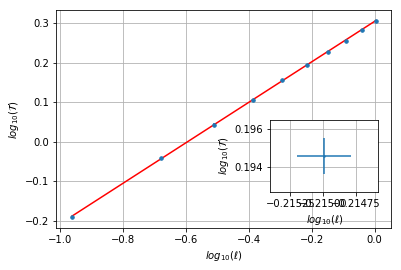

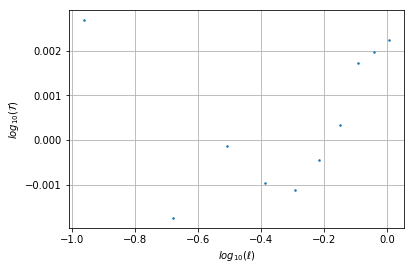

array([ 0.00412783, -0.04117342, -0.09175632, -0.149017  , -0.21499066,
       -0.29281319, -0.38769307, -0.50926919, -0.67871233, -0.96038762])

array([0.00012434, 0.00013801, 0.00015506, 0.00017691, 0.00020593,
       0.00024635, 0.0003065 , 0.00040551, 0.00059903, 0.00114584])

array([ 0.30444744,  0.28144246,  0.25570658,  0.22768107,  0.19456984,
        0.15527529,  0.1063949 ,  0.0431264 , -0.04229696, -0.19138396])

array([0.00274809, 0.00252654, 0.00138882, 0.00193595, 0.00094909,
       0.00118422, 0.00109096, 0.00310386, 0.00301631, 0.00194405])

In [6]:
# Grafici logaritmici
x3 = np.array(np.log10(x2))
y3 = np.array(np.log10(y2))
elog10 = np.log10(mt.e)
x3err = np.array((np.transpose(elog10 * x2err / lunghezze2)).tolist())
y3err = np.array((elog10 * errPeriodi2 / mediaPeriodi2).tolist())

display(x3,y3,x3err,y3err)

# Faccio il fit e studio la pendenza della retta
popt3,pcov3 = curve_fit(linfunc, x3, y3, sigma=y3err)
popt3_1,pcov3_1 = curve_fit(linfunc, x3, y3, sigma=y3err)
B3 = popt3_1[0]
B3err = lferr(x3,y3,y3err)[0]
A3 = popt3_1[1]
A3err = lferr(x3,y3,y3err)[1]
a3 = 10**A3
a3err = a3 * A3err
print('La pendenza della retta è: (%.3f +- %.3f)' % (B3, B3err))
stattest(B3, 1/2, B3err, 0, 3)

# Grafico (X, Y) con scale lineari
fig3 = plt.figure()
plt.xlabel('$log_{10}(\ell)$')
plt.ylabel('$log_{10}(\mathcal{T})$')
#plt.subplot(211)
plt.errorbar(x3, y3, xerr=x3err, yerr=y3err, fmt=' ', marker='.', ms=7, capsize=0)
plt.plot(x3, linfunc(x3, *popt3), 'r-')
plt.grid()
#plt.xlabel('lunghezze [m]')
#plt.ylabel('periodi [s]')
sub3 = plt.axes([.62, .25, .25, .25])
sub3.grid()
sub3.set_xlabel('$log_{10}(\ell)$')
sub3.set_ylabel('$log_{10}(\mathcal{T})$')
sub3.errorbar(x3, y3, xerr=x3err, yerr=y3err, fmt=' ', marker='.', ms=3, capsize=0)
sub3.set_xlim([x3[4] - 2*x3err[4], x3[4] + 2*x3err[4]])
sub3.set_ylim([y3[4] - 2*y3err[4], y3[4] + 2*y3err[4]])
#sub2.set_xlabel('lunghezze [m]')
#sub2.set_ylabel('periodi [s]')
fig3.savefig("fig3.pdf", bbox_inches='tight')
plt.show()

# Grafico dei residui
r3 = (linfunc(x3, *popt3) - y3)
figaux3 = plt.figure()
plt.xlabel('$log_{10}(\ell)$')
plt.ylabel('$log_{10}(\mathcal{T})$')
plt.grid()
plt.errorbar(x3, r3, fmt=' ', marker='.', ms=3, capsize=0)
figaux3.savefig("r3.pdf", bbox_inches='tight')
plt.show()

# Grafico (X, Y) con scale lineari
fig4 = plt.figure()
ax4 = plt.plot()
plt.xscale("log", nonposx='clip')
plt.yscale("log", nonposy='clip')
plt.xlabel('lunghezze [m]')
plt.ylabel('periodi [s]')
plt.grid()
plt.errorbar(x2, y2, xerr=x2err, yerr=y2err, fmt=' ', marker='.', ms=7, capsize=0)
#sub4 = plt.axes([.62, .25, .25, .25])
#sub4.grid()
#sub4.set_xscale("log", nonposx='clip')
#sub4.set_yscale("log", nonposy='clip')
#sub4.set_xlabel('lunghezze [m]')
#sub4.set_ylabel('periodi [s]')
#sub4.grid()
#sub4.errorbar(x2, y2, xerr=x2err, yerr=y2err, fmt=' ', marker='.', ms=3, capsize=0)
#sub4.set_xlim([x2[4] - 2*x2err, x2[4] + 2*x2err])
#sub4.set_ylim([y2[4] - 2*y2err[4], y2[4] + 2*y2err[4]])
plt.show()
fig4.savefig("fig4.pdf", bbox_inches='tight')
display(x3, x3err, y3, y3err)

Dato
$$
Y = A+BX
$$
Adesso dobbiamo trovare i parametri A e B calcolati come:
\begin{equation}
	A = \frac{(\sum_i{w_i x_i^2})(\sum_i w_i y_i) - (\sum_i w_i x_i)(\sum_i w_i x_i y_i)}{\Delta},
	\label{eq:parA}
\end{equation}
\begin{equation}
	B = \frac{(\sum_i w_i)(\sum_i w_i x_i y_i) - (\sum_i w_i y_i)(\sum_i w_i x_i)}{\Delta},
	\label{eq:parB}
\end{equation}
\begin{equation}
	\sigma A = \sqrt{\frac{\sum_i w_i x_i^2}{\Delta}},\,
	\sigma B = \sqrt{\frac{\sum_i w_i}{\Delta}},
	\label{eq:errAB}
\end{equation}
dove
\begin{equation}
	\Delta = (\sum_i w_i)(\sum_i w_i x_i^2) - (\sum_i w_i x_i)^2
	\label{eq:Delta}
\end{equation}
e
\begin{equation}
	w_i = \frac{1}{(\sigma y_i)^2}.
	\label{eq:weights}
\end{equation}

Per trasformare l'incertezza su X in un contributo all'incertezza su Y si può usare la seguente formula:
\begin{equation}
    \sigma Y_\text{tr} = \left| \frac{dY}{dX} \right| \sigma X = |{ B }| \sigma X
\end{equation}

In [7]:
# Calcolo dei parametri A e B
y3errtr = abs(B3) * x3err
y3_1err = y3err + y3errtr
popt2,pcov2 = curve_fit(linfunc,x3,y3,sigma=y3_1err)
lferr2 = lferr(x3,y3,y3_1err)
A2 = popt2[1] # Intercetta
A2err = lferr2[1]
B2 = popt2[0] # Pendenza
B2err = lferr2[0]
print('I parametri sono:')
print('A = (%.3f +- %.3f)' % (A2, A2err))
print('B = (%.3f +- %.3f)' % (B2, B2err))

stattest(B2, 1/2, B2err, 0, 3)

# Test del chi quadro su fit (lunghezza, periodi)
chiq4 = chiq(linfunc(x3,*popt2),y3,y3err)
testchiq(8,0.005,0.995,chiq4)

I parametri sono:
A = (0.304 +- 0.001)
B = (0.513 +- 0.003)
Il test non è superato con un confidenza di 3.0 sigma
Chi quadrato per modello e osservazioni: 7.128171.
Studiamo se il chi quadro è nel range [1.344413, 21.954955]
Test del chi quadro superato!


Dopo la correzione dell'errore il test statistico è superato con confidenza $5\sigma$.

In [8]:
# Confronto errori relativi
rerrl = x2err/x2
rerrt = np.array(y2err)/np.array(y2)
rerrcfr = pd.DataFrame([rerrl,rerrt,rerrl/rerrt*100])
display(rerrcfr)

0         1          2         3          4          5          6  \
0  0.000286  0.000318   0.000357  0.000407   0.000474   0.000567   0.000706   
1  0.006328  0.005818   0.003198  0.004458   0.002185   0.002727   0.002512   
2  4.524571  5.462389  11.164658  9.138146  21.697972  20.802631  28.094475   

           7          8          9  
0   0.000934   0.001379   0.002638  
1   0.007147   0.006945   0.004476  
2  13.064811  19.859655  58.940820

Nella tabella precedente sono rappresentati gli errori relativi rispetto alle lunghezze, ai periodi e il loro rapporto percentuale. Vediamo come gli errori sulla lunghezza diventano considerevolmente comparabili all'aumentare della lunghezza della misura, ma questo è probabilmente dovuto al fatto che diminuisce l'errore sul periodo.

A questo punto andrebbero fatte delle considerazioni aposteriori sull'errore, se aggiungere l'errore di x su y eccetera.

Adesso passiamo allo studio della costante $g$.

## Misurazione dell'accelerazione di gravità $g$

In [9]:
# Tabella di l, sigmal, T, sigmaT, g, sigmag
x2 = np.array(x2)
y2 = np.array(y2)
y2_1 = np.array(y2)
y2_1err = np.array(y2err)
g1 = np.power(2 * mt.pi / y2_1, 2) * x2
#g1err = epmult(np.power(2 * mt.pi / y2_1, 2), x2, eppow(2 * mt.pi / y2_1, (eppow(y2_1,y2_1err,-1) * 2 * mt.pi), 2), x2err)
g1err = np.sqrt(np.power(2*mt.pi/y2_1,4) * np.power(x2err,2) + np.power(8 * mt.pi**2 * x2 / np.power(y2_1,3),2) * np.power(y2_1err,2))

df2 = pd.DataFrame([x2, np.ones(np.size(x2))*x2err , y2_1, y2_1err, g1, g1err])
df2

dict3 = {'Lunghezze': x2, 'Errori sulle lunghezze': x2err, 'Periodi': y2, 'Errori sui periodi': y2err, 'Accelerazioni g': g1, 'Errori su g': g1err}
df3 = pd.DataFrame(data=dict3)
df3

Accelerazioni g  Errori su g  Errori sui periodi  Errori sulle lunghezze  \
0         9.808276     0.124160            0.012755                0.000289   
1         9.824295     0.114350            0.011122                0.000289   
2         9.844423     0.063061            0.005762                0.000289   
3         9.817041     0.087614            0.007530                0.000289   
4         9.822666     0.043184            0.003421                0.000289   
5         9.840019     0.053952            0.003899                0.000289   
6         9.905510     0.050254            0.003209                0.000289   
7        10.019309     0.143519            0.007893                0.000289   
8        10.051742     0.140312            0.006301                0.000289   
9        10.440951     0.097449            0.002881                0.000289   

   Lunghezze  Periodi  
0    1.00955   2.0158  
1    0.90955   1.9118  
2    0.80955   1.8018  
3    0.70955   1.6892  
4    0.60955   1.5652  
5    0.50955   1.4298  
6    0.40955   1.2776  
7    0.30955   1.1044  
8    0.20955   0.9072  
9    0.10955   0.6436

Per il calcolo della costante gravitazionale è stata usata la seguente formula
\begin{equation}
    g = (2 \pi / \mathcal{T})^2 \ell
\end{equation}
\begin{equation}
    \sigma g = \left( \frac{2\pi}{\mathcal{T}} \right)^4 (\sigma \ell)^2 + \left( \frac{8 \pi^2 \ell}{\mathcal{T}^3} \right)^2 (\sigma \mathcal{T})^2
\end{equation}

In [10]:
# Faccio la media pesata dei gi e faccio il test del chi quadro
g1w = 1/np.power(g1err,2)
g1wavg = np.average(g1,weights=g1w)
g1wavgerr = wavgerr(g1w)
g1wavg = np.round(g1wavg,2)
g1wavgerr = np.round(g1wavgerr,2)
print('Il valore della media pesata è: (%f +- %f) m/s².' % (g1wavg, g1wavgerr))

# Grafico dei (lunghezze, gi)
fig5 = plt.figure()
ax5 = plt.plot()
plt.grid()
plt.errorbar(x2, g1, xerr=x2err, yerr=g1err, fmt=' ', marker='.', ms=7, capsize=0)
#plt.plot(x2,constfunc(g)*np.ones(10), 'g-', label='$g$ tabulato')
#plt.plot(x2,constfunc(g1wavg)*np.ones(10), 'r-', label='$g_w$ con media pesata')
plt.axhline(y=g1wavg, color='#ff0000', label='$g_w$ con media pesata')
plt.axhspan(ymin=g1wavg-g1wavgerr,ymax=g1wavg+g1wavgerr,color='#ff0000',alpha=.1)
plt.xlabel('lunghezze [m]')
plt.ylabel('valori di g [$ms^{-2}$]')
plt.legend()
sub5 = plt.axes([.63, .45, .25, .25])
sub5.grid()
sub5.errorbar(x2, g1, xerr=x2err, yerr=g1err, fmt=' ', marker='.', ms=3, capsize=0)
sub5.set_xlabel('lunghezze [m]')
sub5.set_ylabel('valori di g [$ms^{-2}$]')
sub5.set_xlim([x2[4] - 2*x2err, x2[4] + 2*x2err])
sub5.set_ylim([g1[4] - 2*g1err[4], g1[4] + 2*g1err[4]])
fig5.savefig("fig5.pdf", bbox_inches='tight')
plt.show()

# Grafico dei residui
r2 = (constfunc(g1wavg)*np.ones(10) - g1)
figaux2 = plt.figure()
plt.errorbar(x2, r2, fmt=' ', marker='.', ms=3, capsize=0)
plt.grid()
figaux2.savefig("r2.pdf", bbox_inches='tight')
plt.show()

# Faccio il test del chi quadro tra funzione costante e il set di dati
chiq5_1 = chiq(constfunc(g)*np.ones(np.size(g1wavg)), g1wavg, g1wavgerr)
testchiq(9, 0.005, 0.995, chiq5_1)

chiq5_2 = chiq(constfunc(g)*np.ones(np.size(g1)), g1, g1err)
testchiq(9, 0.005, 0.995, chiq5_2)

# Rimuovo gli ultimi cinque dati (il che significa le misure più corte)
chiq5_3 = chiq(constfunc(g)*np.ones(np.size(g1[:4])), g1[:4], g1err[:4])
testchiq(4, 0.005, 0.995, chiq5_3)

display(g1w)

Il valore della media pesata è: (9.890000 +- 0.020000) m/s².


Chi quadrato per modello e osservazioni: 17.181025.
Studiamo se il chi quadro è nel range [1.734933, 23.589351]
Test del chi quadro superato!
Chi quadrato per modello e osservazioni: 52.256673.
Studiamo se il chi quadro è nel range [1.734933, 23.589351]
Test del chi quadro non superato!
Chi quadrato per modello e osservazioni: 0.385865.
Studiamo se il chi quadro è nel range [0.206989, 14.860259]
Test del chi quadro superato!


array([ 64.86938028,  76.47660232, 251.46834952, 130.27233495,
       536.23260647, 343.54355749, 395.96118252,  48.54896404,
        50.79391804, 105.30380869])

In [11]:
# Faccio il chi quadro con tutti i dati
chiq6_1 = chiq(constfunc(g1wavg)*np.ones(np.size(g1)), g1, g1err)
testchiq(9, 0.005, 0.995, chiq6_1)

# Tolgo le quattro misure più piccole
chiq6 = chiq(constfunc(g1wavg)*np.ones(np.size(g1[:8])), g1[:8], g1err[:8])
testchiq(5, 0.005, 0.995, chiq6)

# Faccio la media campionaria
gac = np.mean(g1)
gacerr = np.std(g1)/np.sqrt(np.size(g1)-1)
#gac = np.round(gac,2)
#gacerr = np.round(gacerr,1)
print('Il valore della media campionaria è: (%.1f +- %.1f) m/s².' % (gac, gacerr))

# Trovo gaw
gaweights = 1/np.power(g1err,2)
gaw = np.average(g1[:2],weights=gaweights[:2])
gawerr = wavgerr(gaweights[:2])
gaw = np.round(gaw,2)
gawerr = np.round(gawerr,2)

# Trovo gag
print('Il termine a di T=al^b è (%.3f +- %.3f).' % (a3, a3err))
gag = np.power(2 * mt.pi / a3, 2)
gagerr = 8 * mt.pi**2 * a3err / a3**3
gag = np.round(gag,2)
gagerr = np.round(gagerr,2)
print('Il valore ottenuto dalla pendenza è (%.2f +- %.2f) m/s²' % (gag, gagerr))

Chi quadrato per modello e osservazioni: 39.469045.
Studiamo se il chi quadro è nel range [1.734933, 23.589351]
Test del chi quadro non superato!
Chi quadrato per modello e osservazioni: 6.175629.
Studiamo se il chi quadro è nel range [0.411742, 16.749602]
Test del chi quadro superato!
Il valore della media campionaria è: (9.9 +- 0.1) m/s².
Il termine a di T=al^b è (2.016 +- 0.002).
Il valore ottenuto dalla pendenza è (9.71 +- 0.02) m/s²


In [12]:
# Faccio lo stattest con i valori di g
stattest(gaw,g,gawerr,0,3)
stattest(gac,g,gacerr,0,3)
stattest(gag,g,gagerr,0,3)

# Stimo aposteriori l'errore sistematico sul periodo (err su l = 0)
y2_1serr = np.sqrt(1/4 * np.power(g1wavgerr/g1wavg, 2) * np.power(y2_1, 2))
display(y2_1serr)

# Stimo aposteriori l'errore sistematico sulla lunghezza (err su T = 0)
y2_1serr2 = g1wavgerr/g1wavg * x2
display(y2_1serr2)

Il test è superato con una confidenza di 3.0 sigma!
Il test è superato con una confidenza di 3.0 sigma!
Il test non è superato con un confidenza di 3.0 sigma


array([0.00203822, 0.00193306, 0.00182184, 0.00170799, 0.00158261,
       0.0014457 , 0.00129181, 0.00111668, 0.00091729, 0.00065076])

array([0.00204156, 0.00183933, 0.00163711, 0.00143488, 0.00123266,
       0.00103043, 0.00082821, 0.00062599, 0.00042376, 0.00022154])

## Confronto dei valori di $g$

Abbiamo dunque i tre valori di $g$:

- quello calcolato con la media pesata, $g_w$ = ( {{gaw}} $\pm$ {{gawerr}} ) m/s²;
- quello calcolato con la media campionaria, $g_c$ = ( {{gac}} $\pm$ {{gacerr}} ) m/s²;
- quello calcolato con la pendenza, $g_g$ = ( {{gag}} $\pm ${{gagerr}} ) m/s².

Il valore teorico è {{g}} m/s².

## Conclusioni

- Correzione con modello di pendolo fisico
- Calcolo dell'entità dell'errore sistematico

## Domande

- Cosa vuol dire tenendo conto del significato del significato probabilistico di incertezza tipo

## Discussione

Non torna g calcolato con la pendenza. Utilizzo l'approssimazione di pendolo fisico.

\[
    g = \frac{4\pi^2\ell}{\mathcal{T}^2} \left( 1 + \frac{R^2}{4\ell^2} + \frac{h^2}{12 \ell^2} \right)
\]
\[
    \sigma g = \sqrt{ \frac{ \left( \frac{\sigma R}{R} \right)^2 + 2 \left( \frac{\sigma \ell}{\ell} \right)^2 + \left( \frac{\sigma h}{h} \right)^2 }{ \left( 1 + \frac{R^2}{4\ell^2} + \frac{h^2}{12\ell^2} \right)^2 } + \frac{ \left( \frac{\sigma \ell}{\ell} \right)^2 + \left( \frac{\sigma \mathcal{T}}{\mathcal{T}} \right)^2 }{ \left( \frac{\ell}{\mathcal{T}^2} \right)^2 } }
\]

In [13]:
radius = 2e-2
radiuserr = Dlength/2*np.sqrt(12)
height = hCil[2]
heighterr = Dlength/np.sqrt(12)

# Provo a ricalcolare i g con l'approssimazione di pendolo fisico...
#g3 = (4 * mt.pi**2 * x2)/(np.power(y2,2)) * (1 + radius**2/(4 * np.power(x2,2)) + height**2/(12 * np.power(x2,2)))
#g3err = np.sqrt( ( (radiuserr/radius)**2 + 2*np.power((x2err)/(x2),2) + (heighterr/height)**2 )/np.power( 1 + radius**2/(4 * np.power(x2, 2)) + height**2/(12 * np.power(x2, 2)) , 2 ) + ( np.power(x2err/x2, 2) + np.power(y2err/y2,2) )/( np.power(x2/np.power(y2,2), 2) ) )
# Ma mi vengono peggio i dati rispetto al pendolo semplice. forse è meglio se valuto il sistematico comparando il
# fattore moltiplicativo di 2pisqrt(l/g)
fattore = np.sqrt(1 + radius**2/(4 * np.power(x2,2)) + height**2/(12 * np.power(x2,2)))
#display(fattore,1/fattore,fattoreerr)
display(height/(2 * np.sqrt(3) * y2))

y4 = y2 / fattore

array([0.00273524, 0.00288403, 0.0030601 , 0.00326409, 0.00352268,
       0.00385627, 0.00431567, 0.00499248, 0.00607771, 0.00856696])

In [14]:
#y4err = y4 *np.sqrt(np.power(y2err/y2,2) + ((()*())/(1))
#y4err = y4 * np.sqrt(np.power(y2err/y2,2) + (((radius/(2 * y2))*((radiuserr/radius)**2 + np.power(y2err/y2,2)) + (height/(2 * np.sqrt(3) * y2))((heighterr/height)**2 + np.power(y2err/y2,2)))/(1 + radius**2/(4*np.power(y2,2)) + height**2/(12*np.power(y2,2)))))

array([0.01782219, 0.01644533, 0.01307099, 0.0136376 , 0.01145098,
       0.0111504 , 0.01038088, 0.01213205, 0.01045113, 0.00754628])

array([2.01567106, 1.91164934, 1.80162077, 1.68898128, 1.56492541,
       1.42944109, 1.27710366, 1.10364929, 0.90585596, 0.64013167])

array([0.01782219, 0.01644533, 0.01307099, 0.0136376 , 0.01145098,
       0.0111504 , 0.01038088, 0.01213205, 0.01045113, 0.00754628])

t4     t4err
0  2.015671  0.017822
1  1.911649  0.016445
2  1.801621  0.013071
3  1.688981  0.013638
4  1.564925  0.011451
5  1.429441  0.011150
6  1.277104  0.010381
7  1.103649  0.012132
8  0.905856  0.010451
9  0.640132  0.007546

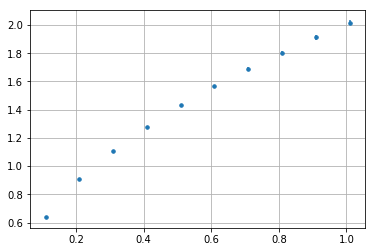

I parametri sono:
A = (0.304 +- 0.002)
B = (0.514 +- 0.005)
Il test è superato con una confidenza di 3.0 sigma!
Chi quadrato per modello e osservazioni: 1.803192.
Studiamo se il chi quadro è nel range [1.344413, 21.954955]
Test del chi quadro superato!


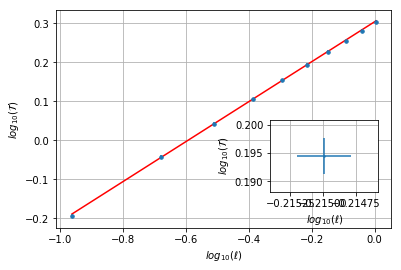

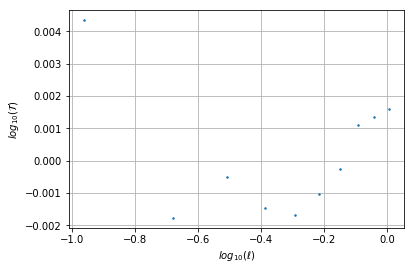

Il termine a di T=al^b è (2.016 +- 0.002).
Il valore ottenuto dalla pendenza è (9.74 +- 0.03) m/s²
Il test è superato con una confidenza di 3.0 sigma!


In [15]:
y4err = y4 * np.sqrt(np.power(y2err/y2,2) + (((radius/(2 * y2))*((radiuserr/radius)**2 + np.power(y2err/y2,2)) + (height/(2 * np.sqrt(3) * y2))*((heighterr/height)**2 + np.power(y2err/y2,2)))/(1 + radius**2/(4*np.power(y2,2)) + height**2/(12*np.power(y2,2)))))
display(y4err)
display(y4,y4err)
data1 = {'t4':y4, 't4err':y4err}
df1 = pd.DataFrame(data=data1)
display(df1)
residui = y4 - y2
residuierr = np.sqrt(np.power(y2err,2) + np.power(y4err,2))
fig6 = plt.figure()
plt.grid()
plt.errorbar(x2,y4,xerr=x2err,yerr=y4err, fmt=' ', marker='.', ms=7, capsize=0)
fig6.savefig("fig6.pdf", bbox_inches='tight')
plt.show()

# Grafici logaritmici
x4l = np.array(np.log10(x2))
y4l = np.array(np.log10(y4))
elog10 = np.log10(mt.e)
x4lerr = np.array((np.transpose(elog10 * x2err / lunghezze2)).tolist())
y4lerr = np.array((elog10 * y4err / y4).tolist())

# Faccio il fit e studio la pendenza della retta
popt4,pcov4 = curve_fit(linfunc, x4l, y4l, sigma=y4lerr)
B4 = popt4[0]
B4err = lferr(x4l,y4l,y4lerr)[0]
A4 = popt4[1]
A4err = lferr(x4l,y4l,y4lerr)[1]
a4 = 10**A4
a4err = a4 * A4err
print('I parametri sono:')
print('A = (%.3f +- %.3f)' % (A4, A4err))
print('B = (%.3f +- %.3f)' % (B4, B4err))
stattest(B4, 1/2, B4err, 0, 3)

# Test chi quadro
chiq7 = chiq(linfunc(x4l,*popt4),y4l,y4lerr)
testchiq(8,0.005,0.995,chiq7)

# Grafico (X, Y) con scale lineari
fig7 = plt.figure()
#plt.subplot(211)
plt.xlabel('$log_{10}(\ell)$')
plt.ylabel('$log_{10}(\mathcal{T})$')
plt.errorbar(x4l, y4l, xerr=x4lerr, yerr=y4lerr, fmt=' ', marker='.', ms=7, capsize=0)
plt.plot(x4l, linfunc(x4l, *popt3), 'r-')
plt.grid()
#plt.xlabel('lunghezze [m]')
#plt.ylabel('periodi [s]')
sub3 = plt.axes([.62, .25, .25, .25])
sub3.set_xlabel('$log_{10}(\ell)$')
sub3.set_ylabel('$log_{10}(\mathcal{T})$')
sub3.grid()
sub3.errorbar(x4l, y4l, xerr=x4lerr, yerr=y4lerr, fmt=' ', marker='.', ms=3, capsize=0)
sub3.set_xlim([x4l[4] - 2*x4lerr[4], x4l[4] + 2*x4lerr[4]])
sub3.set_ylim([y4l[4] - 2*y4lerr[4], y4l[4] + 2*y4lerr[4]])
#sub2.set_xlabel('lunghezze [m]')
#sub2.set_ylabel('periodi [s]')
fig7.savefig("fig7.pdf", bbox_inches='tight')
plt.show()

# Grafico dei residui
r4 = (linfunc(x4l, *popt4) - y4l)
figaux4 = plt.figure()
plt.xlabel('$log_{10}(\ell)$')
plt.ylabel('$log_{10}(\mathcal{T})$')
plt.grid()
plt.errorbar(x4l, r4, fmt=' ', marker='.', ms=3, capsize=0)
figaux4.savefig("r4.pdf", bbox_inches='tight')
plt.show()

# Trovo gagnew
print('Il termine a di T=al^b è (%.3f +- %.3f).' % (a3, a3err))
gagnew = np.power(2 * mt.pi / a4, 2)
gagnewerr = 8 * mt.pi**2 * a4err / a4**3
gagnew = np.round(gagnew,2)
gagnewerr = np.round(gagnewerr,2)
print('Il valore ottenuto dalla pendenza è (%.2f +- %.2f) m/s²' % (gagnew, gagnewerr))

# Faccio il test statistico su gagnew
stattest(gagnew,g,gagnewerr,0,3)

In [16]:
# Studio dell'errore sull'angolo
widtherr = (Dlength/np.sqrt(12))
x5 = [1.0100, 0.9100, 0.8100, 0.7100, 0.6100, 0.5100, 0.4100, 0.3100, 0.2100, 0.1100]
w5 = [0.0880, 0.0790, 0.0710, 0.0620, 0.0530, 0.0450, 0.0360, 0.0270, 0.0180, 0.0100]
theta = np.array(w5)/np.array(x5)
thetaerr = np.sqrt(np.power(x2err/x5,2) + np.power(widtherr/w5,2))
dict4 = {'length': x5, 'lengtherr': x2err, 'width': w5, 'widtherr': widtherr, 'theta': theta, 'thetaerr': thetaerr}
angdf = pd.DataFrame(data=dict4)
angdf = angdf[['length','lengtherr','width','widtherr','theta','thetaerr']]
#with open('table2.tex','w') as tf:
#    tf.write(angdf.to_latex())
1/4*(mt.sin(angdf['theta'][0]))**2

0.0018930555478993878